Practice notebook for univariate analysis using NHANES data
This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES. These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook. You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [70]:
da = pd.read_csv("nhanes_2015_2016.csv")

In [71]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


Question 1 
Relabel the marital status variable DMDMARTL to have brief but informative character labels. Then construct a frequency table of these values for all people, then for women only, and for men only. Then construct these three frequency tables using only people whose age is between 30 and 40

In [90]:

da['Marital Status'] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 
                                       6: "Living with partner", 77: "Refused", 99: "Don't know"}).fillna("Missing")


In [91]:
da['Gender'] = da['RIAGENDR'].replace({1: 'Male', 2: 'Female'})


Female    2976
Male      2759
Name: Gender, dtype: int64

In [92]:

da['Marital Status'].fillna('Missing', inplace = True)

In [93]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,Marital Status,Gender
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Married,Male
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Divorced,Male
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Married,Male
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Living with partner,Female
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Divorced,Female


In [94]:
da['Marital Status'].value_counts()

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: Marital Status, dtype: int64

In [97]:
da[da['Gender'] == 'Male']['Marital Status'].value_counts()

Married                1477
Never married           484
Living with partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: Marital Status, dtype: int64

In [96]:
da[da['Gender'] == 'Female']['Marital Status'].value_counts()

Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Missing                 126
Separated               118
Refused                   1
Name: Marital Status, dtype: int64

In [98]:
da['age_30_40'] = pd.cut(da['RIDAGEYR'], [30, 40])
da.groupby(['age_30_40'])['Marital Status'].value_counts()

age_30_40  Marital Status     
(30, 40]   Married                516
           Never married          186
           Living with partner    129
           Divorced                67
           Separated               29
           Widowed                  4
           Refused                  1
Name: Marital Status, dtype: int64

In [99]:
da[da['Gender'] == 'Female'].groupby('age_30_40')['Marital Status'].value_counts()

age_30_40  Marital Status     
(30, 40]   Married                258
           Never married           97
           Living with partner     57
           Divorced                43
           Separated               17
           Widowed                  2
Name: Marital Status, dtype: int64

In [100]:
da[da['Gender'] == 'Male'].groupby('age_30_40')['Marital Status'].value_counts()

age_30_40  Marital Status     
(30, 40]   Married                258
           Never married           89
           Living with partner     72
           Divorced                24
           Separated               12
           Widowed                  2
           Refused                  1
Name: Marital Status, dtype: int64

Q1a. Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

In [101]:
dx = da.groupby(["Marital Status"])["Gender"].value_counts().unstack()
dx = dx.apply(lambda x: x/x.sum(), axis=0)
print(dx.to_string(float_format="%.4f"))
# comparitivly the Marital status of mens are high then womens and also the death rate of men are high 
#living with partner rate of womens are low as compare to men also the separation rate of womens are high 

Gender               Female   Male
Marital Status                    
Divorced             0.1176 0.0830
Living with partner  0.0880 0.0960
Married              0.4378 0.5353
Missing              0.0423 0.0489
Never married        0.1747 0.1754
Refused              0.0003 0.0004
Separated            0.0397 0.0246
Widowed              0.0995 0.0362


Q1b. Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

In [107]:
#between the distribution of marital status states for women between the overall population
da["agegrp"] = pd.cut(da.RIDAGEYR,[30,40])
da[(da.Gender == "Female")]['Marital Status'].value_counts()/da["Marital Status"].shape[0]


Married                0.227201
Never married          0.090671
Divorced               0.061029
Widowed                0.051613
Living with partner    0.045684
Missing                0.021970
Separated              0.020575
Refused                0.000174
Name: Marital Status, dtype: float64

In [111]:
#between the distribution of marital status states for women between the ages of 30 and 40
da["agegrp"] = pd.cut(da.RIDAGEYR,[30,40])
da[(da.Gender == "Female") & (da.agegrp == pd.Interval(30,40))]['Marital Status'].value_counts()/da["Marital Status"].shape[0]

Married                0.044987
Never married          0.016914
Living with partner    0.009939
Divorced               0.007498
Separated              0.002964
Widowed                0.000349
Name: Marital Status, dtype: float64

Q1c. Repeat part b for the men.

In [112]:
#between the distribution of marital status states for men between the overall population
da["agegrp"] = pd.cut(da.RIDAGEYR,[30,40])
da[(da.Gender == "Male")]['Marital Status'].value_counts()/da["Marital Status"].shape[0]

Married                0.257541
Never married          0.084394
Living with partner    0.046207
Divorced               0.039930
Missing                0.023540
Widowed                0.017437
Separated              0.011857
Refused                0.000174
Name: Marital Status, dtype: float64

In [113]:
#between the distribution of marital status states for men between the ages of 30 and 40
da["agegrp"] = pd.cut(da.RIDAGEYR,[30,40])
da[(da.Gender == "Male") & (da.agegrp == pd.Interval(30,40))]['Marital Status'].value_counts()/da["Marital Status"].shape[0]

Married                0.044987
Never married          0.015519
Living with partner    0.012554
Divorced               0.004185
Separated              0.002092
Widowed                0.000349
Refused                0.000174
Name: Marital Status, dtype: float64

Question 2
Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band. Within each age band, present the distribution in terms of proportions that must sum to 1.

In [115]:
# insert your code here
x = da[da.Gender == "Female"]
x["agegrp2"] = pd.cut(da.RIDAGEYR, [10,20, 30, 40, 50, 60, 70, 80])
dx = x.groupby(["agegrp2"])["Marital Status"].value_counts().unstack()
dx = dx.apply(lambda y: y/y.sum(), axis=0)
print(dx.to_string(float_format="%.2f"))

<ipython-input-115-9f8129cd1f6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["agegrp2"] = pd.cut(da.RIDAGEYR, [10,20, 30, 40, 50, 60, 70, 80])


Marital Status  Divorced  Living with partner  Married  Missing  Never married  Refused  Separated  Widowed
agegrp2                                                                                                    
(10, 20]             NaN                 0.03     0.00     1.00           0.06      NaN        NaN      NaN
(20, 30]            0.03                 0.40     0.12      NaN           0.44      NaN       0.09      NaN
(30, 40]            0.12                 0.22     0.20      NaN           0.19      NaN       0.14     0.01
(40, 50]            0.20                 0.14     0.22      NaN           0.12      NaN       0.28     0.04
(50, 60]            0.24                 0.12     0.20      NaN           0.08     1.00       0.23     0.09
(60, 70]            0.24                 0.07     0.16      NaN           0.07      NaN       0.19     0.22
(70, 80]            0.17                 0.01     0.10      NaN           0.04      NaN       0.07     0.64


Q2a. Comment on the trends that you see in this series of marginal distributions

Widowed rate increases for women with age 

Q2b. Repeat the construction for males.

In [117]:
# insert your code here
x = da[da.Gender == "Male"]
da["agegrp"] = pd.cut(da.RIDAGEYR, [10,20, 30, 40, 50, 60, 70, 80])
dx = x.groupby(["agegrp"])["Marital Status"].value_counts().unstack()
dx = dx.apply(lambda y: y/y.sum(), axis=0)
print(dx.to_string(float_format="%.2f"))

Marital Status  Divorced  Living with partner  Married  Missing  Never married  Refused  Separated  Widowed
agegrp                                                                                                     
(10, 20]             NaN                 0.01     0.00     1.00           0.07      NaN        NaN      NaN
(20, 30]            0.01                 0.35     0.07      NaN           0.47      NaN       0.10     0.02
(30, 40]            0.10                 0.27     0.17      NaN           0.18     1.00       0.18     0.02
(40, 50]            0.15                 0.12     0.19      NaN           0.08      NaN       0.16     0.02
(50, 60]            0.25                 0.13     0.20      NaN           0.10      NaN       0.15     0.10
(60, 70]            0.24                 0.08     0.20      NaN           0.08      NaN       0.21     0.17
(70, 80]            0.25                 0.03     0.17      NaN           0.02      NaN       0.21     0.67


Q2c. Comment on any notable differences that you see when comparing these results for females and for males.

separation rate little increases for women with age 

Question 3
Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


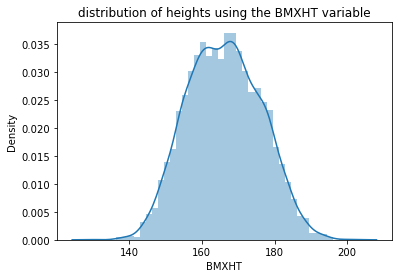

In [118]:
# insert your code here
sns.distplot(da.BMXHT.dropna()).set(title='distribution of heights using the BMXHT variable')
plt.show()

Q3a. Use the bins argument to distplot to produce histograms with different numbers of bins. Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


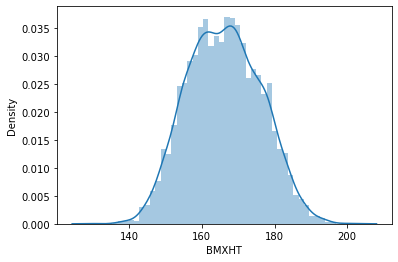

In [119]:
sns.distplot(da.BMXHT.dropna(), bins = 50)
plt.show()

Q3b. Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

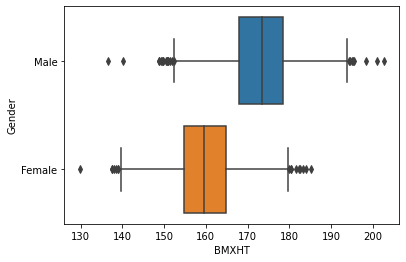

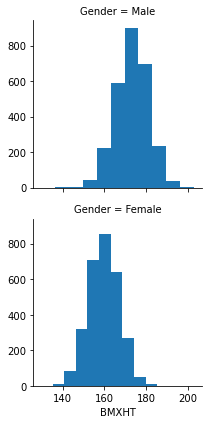

In [122]:
# insert your code here
sns.boxplot(x = da["BMXHT"], y = da["Gender"])
g = sns.FacetGrid(da, row = "Gender")
g = g.map(plt.hist, "BMXHT")
plt.show()

Q3c. Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

In [ ]:
Men are taller than women

In [ ]:
#da['BPXSY1_BPXSY2_Differ'] = abs(da['BPXSY1'] - da['BPXSY2'])
# df.boxplot(column=['BPXSY1_BPXSY2_Differ'], figsize =(12,6));

#fig = da.boxplot(column=['BPXSY1_BPXSY2_Differ'], figsize =(12,6));

#fig.update_layout(autosize=False, width=900, height=500,
                 # margin=dict(l=20, r=50, t=50, b=20), title='Absolute Systolic BP Difference',
                  #xaxis_title="Abs. Difference")

# fig.update_yaxes(automargin=True)

#fig.show()

Question 4
Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents (BPXSY1 and BPXSY2).

TypeError: boxplot() missing 1 required positional argument: 'x'

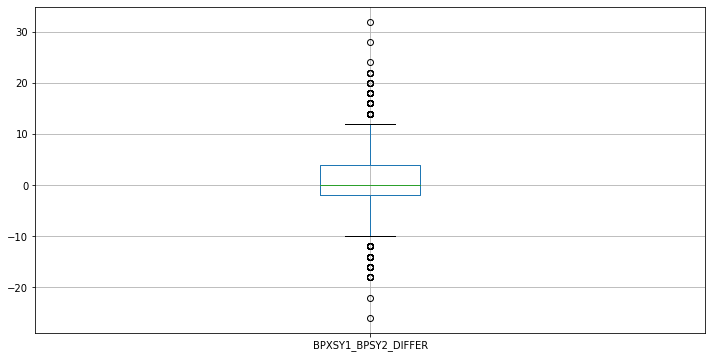

In [57]:
# insert your code here
#x = da[["BPXSY1", "BPXSY2"]]
#x.boxplot()
da['BPXSY1_BPSY2_DIFFER'] = (da['BPXSY1'] - da['BPXSY2'])
x = da.boxplot(column=['BPXSY1_BPSY2_DIFFER'], figsize =(12,6));
x.boxplot()

Q4a. What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [131]:
da['BP1_GT_BP2'] = da['BPXSY1'] > da['BPXSY2']
bp_1_gt_bp_count = da['BP1_GT_BP2'].value_counts()[1] / da['BP1_GT_BP2'].count()
bp_1_gt_bp_count

0.42946817785527464

approx 42% of the people have  BPXSY2 Lower than BPXSY1

Q4b. Make side-by-side boxplots of the two systolic blood pressure variables.

In [ ]:
x = da.boxplot(da, x=['BPXSY1','BPXSY2'], points="all")

x.update_layout(autosize=False, width=900, height=500,
                  margin=dict(l=20, r=50, t=50, b=20),
                  title='Systolic Blood Pressures',
                  xaxis_title="Value",
                  yaxis_title="Systolic BP")
x.show()

Q4c. Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

Minimum value for BPXSY2 is slightly greater than BPXSY1

Question 5
Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is DMDEDUC2). Convert the frequencies to proportions

In [152]:
da["Education"] = da['DMDEDUC2'].replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"}).fillna('Missing')
da['Education'].value_counts(normalize=True)

Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: Education, dtype: float64

Q5a. Comment on any major differences among the distributions.

Proportion of College Level people is more than 9th to 11th Grade

Q5b. Restrict the sample to people between 30 and 40 years of age. Then calculate the median household size for women and men within each level of educational attainment.

In [155]:
# insert your code here
da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40)].groupby('Education')['DMDHHSIZ'].median()

Education
9-11               5
<9                 5
College            3
HS/GED             4
Some college/AA    4
Name: DMDHHSIZ, dtype: int64

Question 6
The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables SDMVSTRA and SDMVPSU. Calculate the mean age (RIDAGEYR), height (BMXHT), and BMI (BMXBMI) for each gender (RIAGENDR), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [ ]:
#da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDR'])[['RIDAGEYR', 'BMXHT', 'BMXBMI']].mean()

Q6a. Comment on the extent to which mean age, height, and BMI vary among the MVUs.

Q6b. Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU. Report the ratio between the largest and smalles IQR across the MVUs.

In [ ]:
#da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDR'])[['RIDAGEYR', 'BMXHT', 'BMXBMI']].quantile(0.75)

Q6c. Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.

In [ ]:
#da.info()